In [1]:
!pip install seaborn

In [2]:
import requests

def get_content(article_name):
    url = f"https://en.wikipedia.org/w/api.php?action=query&prop=extracts&format=json&exintro=&titles={article_name}"
    response = requests.get(url)
    data = response.json()
#   
    return data
# Test the function
data = get_content("Ozone_layer")
print(data)


{'batchcomplete': '', 'warnings': {'extracts': {'*': 'HTML may be malformed and/or unbalanced and may omit inline images. Use at your own risk. Known problems are listed at https://www.mediawiki.org/wiki/Special:MyLanguage/Extension:TextExtracts#Caveats.'}}, 'query': {'normalized': [{'from': 'Ozone_layer', 'to': 'Ozone layer'}], 'pages': {'22834': {'pageid': 22834, 'ns': 0, 'title': 'Ozone layer', 'extract': '<p class="mw-empty-elt">\n\n</p>\n\n<p>The <b>ozone layer</b> or <b>ozone shield</b> is a region of Earth\'s stratosphere that absorbs most of the Sun\'s ultraviolet  radiation. It contains a high concentration of ozone (O<sub>3</sub>) in relation to other parts of the atmosphere, although still small in relation to other gases in the stratosphere. The ozone layer contains less than 10 parts per million of ozone, while the average ozone concentration in Earth\'s atmosphere as a whole is about 0.3 parts per million. The ozone layer is mainly found in the lower portion of the strato

In [3]:
import re

def merge_contents(data):
    page = next(iter(data['query']['pages'].values()))
    content = page['extract']
    # Remove HTML tags and citations
    content = re.sub(r'<.*?>|\[.*?\]', '', content)
    return content.strip()

merge_content = merge_contents(data)
print(merge_content)


The ozone layer or ozone shield is a region of Earth's stratosphere that absorbs most of the Sun's ultraviolet  radiation. It contains a high concentration of ozone (O3) in relation to other parts of the atmosphere, although still small in relation to other gases in the stratosphere. The ozone layer contains less than 10 parts per million of ozone, while the average ozone concentration in Earth's atmosphere as a whole is about 0.3 parts per million. The ozone layer is mainly found in the lower portion of the stratosphere, from approximately 15 to 35 kilometers (9 to 22 mi) above Earth, although its thickness varies seasonally and geographically.
The ozone layer was discovered in 1913 by French physicists Charles Fabry and Henri Buisson. Measurements of the sun showed that the radiation sent out from its surface and reaching the ground on Earth is usually consistent with the spectrum of a black body with a temperature in the range of 5,500–6,000 K (5,230–5,730 °C), except that there was

In [4]:
def tokenize(content):
    delimiters = [" ", "\n", ",", ".", "(", ")", "[", "]"]
    words = re.split('|'.join(map(re.escape, delimiters)), content)
    return [word.strip() for word in words if word.strip()]

# Define delimiters


tokens = tokenize(merge_content)



In [5]:

def lower_collection(collection):
    return [item.lower() for item in collection]


collection=lower_collection(tokens)
print(collection[:20])  

['the', 'ozone', 'layer', 'or', 'ozone', 'shield', 'is', 'a', 'region', 'of', "earth's", 'stratosphere', 'that', 'absorbs', 'most', 'of', 'the', "sun's", 'ultraviolet', 'radiation']


In [6]:
from collections import Counter

def count_frequency(collection):
    return Counter(collection)

def print_most_frequent(frequencies, n):
    for word, freq in frequencies.most_common(n):
        print(f"{word}: {freq}")

frequencies = count_frequency(collection)
print_most_frequent(frequencies, 20)


the: 37
ozone: 18
of: 18
in: 12
to: 12
a: 10
layer: 8
that: 8
is: 6
radiation: 6
and: 6
was: 6
by: 5
from: 4
stratosphere: 3
ultraviolet: 3
other: 3
parts: 3
atmosphere: 3
about: 3


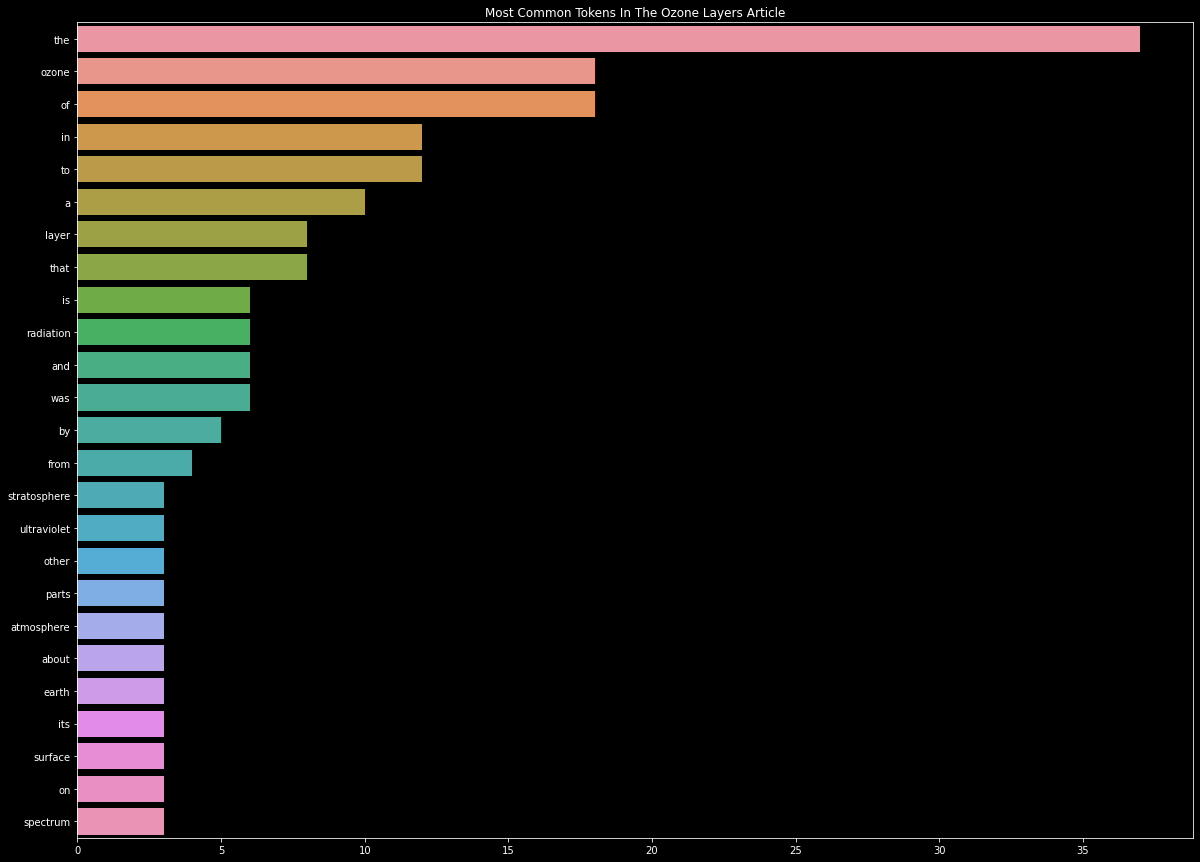

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns
def plot_most_frequent(frequencies, n):
    # Get the top n most frequent words and their frequencies
    words, counts = zip(*frequencies.most_common(n))
    
    # Set plot style
    plt.style.use('dark_background')
    
    # Create a new figure and axis
    f, ax = plt.subplots(figsize=(20, 15))
    
    # Remove grid lines
    ax.grid(False)
    
    # Set color codes
    sns.set_color_codes("muted")
    
    # Create a horizontal bar plot using seaborn
    sns.barplot(y=list(words), x=list(counts), label="Ozone Layer", orient="h", ax=ax)
    
    # Set title
    ax.set_title('Most Common Tokens In The Ozone Layers Article')
    
    # Show the plot
    plt.show()

plot_most_frequent(frequencies, 25)


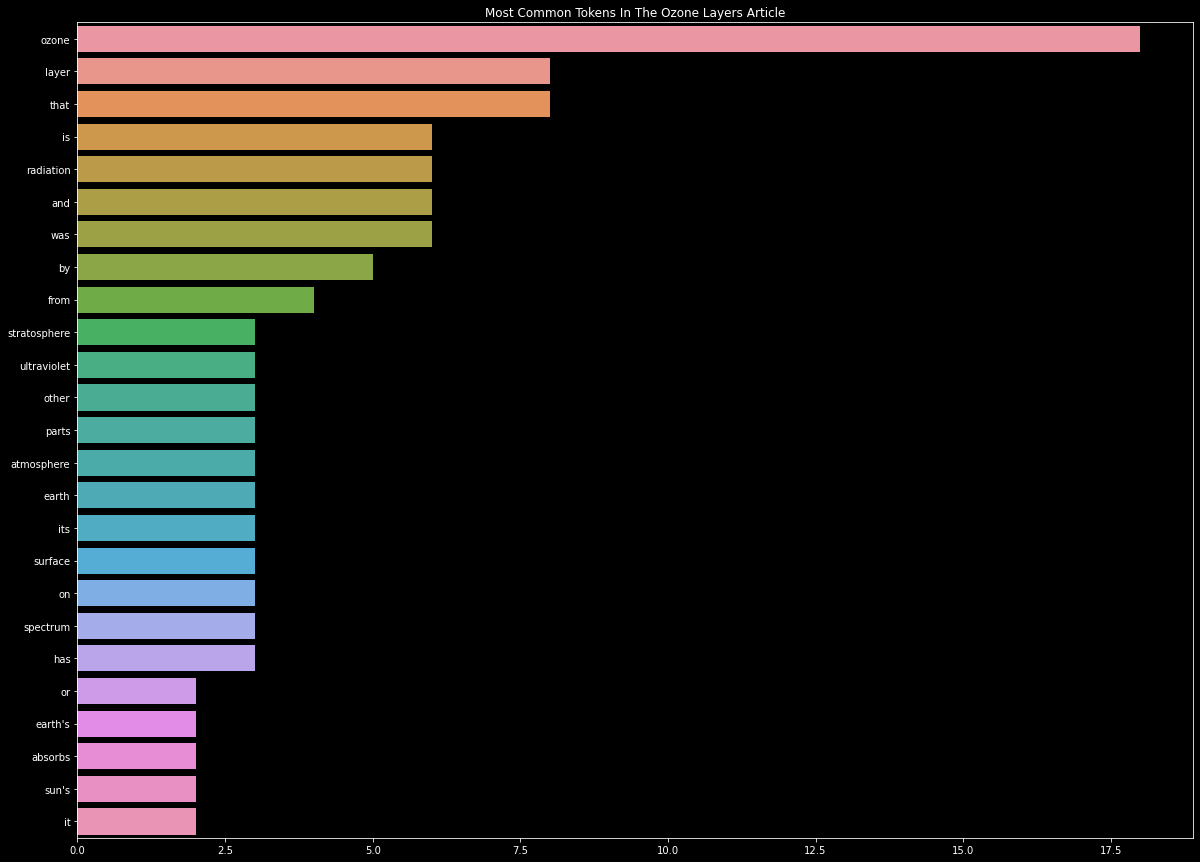

In [8]:
def remove_stop_words(words, stop_words):
    return [word for word in words if word not in stop_words]

stop_words = ["the", "a", "of", "to", "in", "about"]  # Add more stop words as needed
filtered_collection = remove_stop_words(collection, stop_words)

frequencies_filtered = count_frequency(filtered_collection)
plot_most_frequent(frequencies_filtered, 25)


In [9]:
!gandalf



 ██████╗ ██╗    ██╗ █████╗ ███████╗ █████╗ ██████╗    ██╗ ██████╗ 
██╔═══██╗██║    ██║██╔══██╗██╔════╝██╔══██╗██╔══██╗   ██║██╔═══██╗
██║   ██║██║ █╗ ██║███████║███████╗███████║██████╔╝   ██║██║   ██║
██║▄▄ ██║██║███╗██║██╔══██║╚════██║██╔══██║██╔══██╗   ██║██║   ██║
╚██████╔╝╚███╔███╔╝██║  ██║███████║██║  ██║██║  ██║██╗██║╚██████╔╝
 ╚══▀▀═╝  ╚══╝╚══╝ ╚═╝  ╚═╝╚══════╝╚═╝  ╚═╝╚═╝  ╚═╝╚═╝╚═╝ ╚═════╝ 
																																 
Booting Gandalf v4.0.3-df2e622 (production)
Loading parameters:  OK
User seybou-s_y connection: OK


<MY-MR-CLEAN>
Directory . exists: OK
Pushing exercise: OK
Printing your report:

      REPORT        MY-MR-CLEAN 

 Status             SUCCESS     
 Execution Runtime  4.670852    
 Score              [=====] 5/5 


Checks detail Report:

 TEST COUNT FREQUENCY  SUCCESS 



 TEST GET CONTENT  SUCCESS 



 TEST LOWER COLLECTION  SUCCESS 



 TEST MERGE CONTENTS  SUCCESS 



 TEST TOKENIZE  SUCCESS 


</MY-MR-CLEAN>
